In [1]:
%load_ext nb_black
import IPython.display

IPython.display.set_matplotlib_formats("svg")

/var/folders/0v/bg1fydcn2v7_krmn09zqg7f80000gn/T/ipykernel_58281/557324957.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats("svg")


<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
from math import exp, log

<IPython.core.display.Javascript object>

In [3]:
from bmws import sample_paths, BetaMixture, estimate_em

<IPython.core.display.Javascript object>

In [4]:
def load_data(file):
    oo = np.loadtxt(file)
    return [oo[:, 1], oo[:, 0]]


genes = ["LCT"]  # , "SLC45A2", "DHCR7", "HERC2"]

obs = {x: np.loadtxt("data/Britain_" + x + ".txt").astype(int)[::-1] for x in genes}

<IPython.core.display.Javascript object>

CPU times: user 27.1 s, sys: 211 ms, total: 27.3 s
Wall time: 27.3 s


Text(0.5, 0, 'Generations before present')

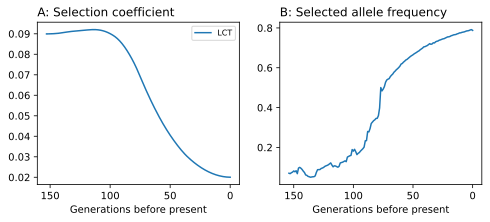

<IPython.core.display.Javascript object>

In [5]:
%%time
fig, axs = plt.subplots(ncols=2, figsize=(8, 3), sharey=False)
# fig2, axs2 = plt.subplots(ncols=2, figsize=(8, 3), sharey=False)

log10_lam = 4.5


for gen in obs:
    data = obs[gen]
    L = len(data)
    Ne = np.full(L - 1, 1e4)
    gr = exp(log(100) / (L))
    Ne = np.array([round(10000 * gr ** (10 * int(x / 10))) for x in range(L - 1)])[::-1]
    s_hat, prior = estimate_em(data, Ne, lam=10 ** log10_lam, em_iterations=3)
    paths, _ = sample_paths(s_hat, Ne, data, 1000, prior=prior)
    axs[0].plot(s_hat, label=gen)
    axs[1].plot(np.mean(paths, axis=0), label=gen)

axs[0].legend(prop={"size": 8})
axs[0].invert_xaxis()
axs[1].invert_xaxis()
axs[0].set_title("A: Selection coefficient", loc="left")
axs[1].set_title("B: Selected allele frequency", loc="left")

# ax.title.set_text(f"Lambda=$10^{log10_lam}$")
# axs[0].plot(ax.get_xlim(), [0., 0.], '--', color="black")

axs[0].set_xlabel("Generations before present")
axs[1].set_xlabel("Generations before present")